In [1]:
#Notebook's settings
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#from jupyterthemes import jtplot
#jtplot.reset()

# Plotting

import sys
Folder='/Users/egordanilov/Desktop/Lesta_shared/GRF_strong_lensing/jax-strong-lensing/'
sys.path.append(Folder)

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
#%matplotlib inline


# Basic imports
import numpy as np
from copy import deepcopy
import pandas as pd
from tqdm import tqdm
import math
import time
import scipy as sc

#JAX
import jax
import jax.numpy as jnp
from jax.config import config
config.update("jax_enable_x64", True)
config.update("jax_debug_nans", True)

from GRF_perturbations.Modules.GRF_inhomogeneities import *

#Fontsize
FS=18

/usr/local/Caskroom/miniforge/base/envs/env_jax/lib/python3.8/site-packages/jax/_src/lib/__init__.py:31: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


In [2]:
GRF_class=GRF_inhomogeneities(100,0.08,100)

In [3]:
BM_vars=np.zeros((1000,2))
for i in range(1000):
    np.random.seed(i)
    BM_vars[i]=Box_Muller_transform()

<AxesSubplot:>

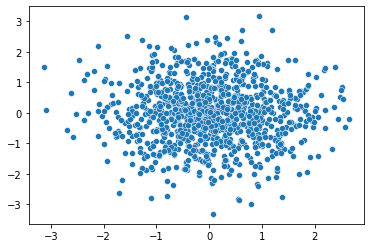

In [5]:
sns.scatterplot(x=BM_vars[:,0],y=BM_vars[:,1])

In [8]:
sc.stats.spearmanr(BM_vars[:,0],BM_vars[:,1])

SpearmanrResult(correlation=-0.006917610917610919, pvalue=0.8270527410868135)

In [35]:
BM_vars[:,1].std()

0.9920004960638594

In [39]:
    def test_potential():

        logA_array=[-9.,-8.,-7.]
        Beta_array=[0,2,4]

        theoretical_Variances=np.zeros((len(logA_array),len(Beta_array),100))
        generated_Variances=np.zeros((len(logA_array),len(Beta_array),100))

        for i,logA in enumerate(logA_array):
            for j,Beta in enumerate(Beta_array):
                #100 variances for each logA,Beta from Parseval's theorem
                theoretical_Variances[i,j]=np.repeat(GRF_class.field_variance([logA,Beta],field='potential'),100)
                #100 variances for each logA,Beta from actually sampled field
                Potentials = np.array([GRF_class.potential([logA,Beta],GRF_class.tensor_unit_Fourier_images[seed])\
                                       for seed in range(100)])
                generated_Variances[i,j]=Potentials.var(axis=(-1,-2))
    
        return theoretical_Variances,generated_Variances

In [40]:
theoretical_Variances,generated_Variances=test_potential()

In [8]:
theoretical_Variances[:,:,0]

array([[9.99900000e-06, 1.78277851e-06, 2.46816092e-05],
       [9.99900000e-05, 1.78277851e-05, 2.46816092e-04],
       [9.99900000e-04, 1.78277851e-04, 2.46816092e-03]])

In [10]:
generated_Variances[:,:,:].mean(axis=-1)

array([[1.00095854e-05, 1.76303985e-06, 2.31289220e-05],
       [1.00095854e-04, 1.76303985e-05, 2.31289220e-04],
       [1.00095854e-03, 1.76303985e-04, 2.31289220e-03]])

In [41]:
q=np.abs(np.log(generated_Variances)-np.log(theoretical_Variances))/np.abs(np.log(theoretical_Variances))

In [33]:
q=(generated_Variances-theoretical_Variances)/np.abs(theoretical_Variances)

(array([680.,  86.,  59.,  35.,  19.,   9.,   6.,   3.,   2.,   1.]),
 array([5.12944815e-06, 2.24827599e-02, 4.49603904e-02, 6.74380209e-02,
        8.99156514e-02, 1.12393282e-01, 1.34870912e-01, 1.57348543e-01,
        1.79826173e-01, 2.02303804e-01, 2.24781434e-01]),
 <BarContainer object of 10 artists>)

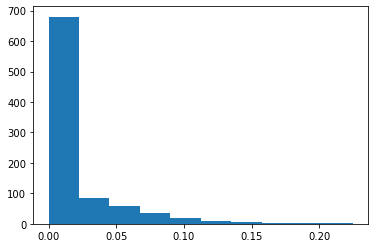

In [42]:
plt.hist(q.flatten())

In [43]:
q.max()

0.224781434299191

In [35]:
  def test_kappa():

        logA_array=[-9.,-8.,-7.]
        Beta_array=[0,2,4]

        theoretical_Variances=np.zeros((len(logA_array),len(Beta_array),100))
        generated_Variances=np.zeros((len(logA_array),len(Beta_array),100))

        for i,logA in enumerate(logA_array):
            for j,Beta in enumerate(Beta_array):
                #100 variances for each logA,Beta from Parseval's theorem
                theoretical_Variances[i,j]=np.repeat(GRF_class.field_variance([logA,Beta],field='kappa'),100)
                #100 variances for each logA,Beta from actually sampled field
                kappas = np.array([self.GRF_class.kappa([logA,Beta],self.GRF_class.tensor_unit_Fourier_images[seed])\
                                       for seed in range(100)])
                generated_Variances[i,j]=kappas.var(axis=(-1,-2))


In [36]:
theoretical_Variances,generated_Variances=test_kappa()

In [37]:
q=np.abs(generated_Variances-theoretical_Variances)/np.abs(theoretical_Variances)

(array([708., 114.,  63.,   6.,   0.,   0.,   3.,   3.,   0.,   3.]),
 array([6.78979308e-05, 2.29747333e-01, 4.59426769e-01, 6.89106204e-01,
        9.18785640e-01, 1.14846508e+00, 1.37814451e+00, 1.60782395e+00,
        1.83750338e+00, 2.06718282e+00, 2.29686225e+00]),
 <BarContainer object of 10 artists>)

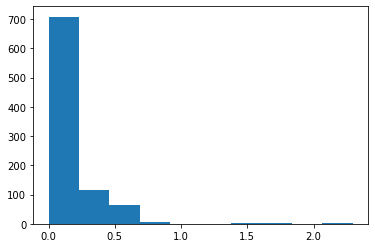

In [38]:
plt.hist(q.flatten())